In [4]:
pip install pandas openpyxl

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached numpy-2.2.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pillow-11.1.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 9.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 9.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 9.6 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.5 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----

In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Resultados experimentales sobre LLMs y la aplicabilidad en el patrón factory method

## Tabla de resultados experimentales de la tasa de éxito en el patrón factory method

In [43]:
import pandas as pd
import numpy as np

# Ruta del archivo Excel
file_path = "resultados.xlsx"

# Función para procesar una tabla con un tamaño de muestra personalizado
def procesar_tabla(df, n):
    # Agrupar por Modelo y calcular estadísticas
    grouped = df.groupby('LLMs').agg({
        'Porcentaje de éxito': ['mean', 'std'],  # Promedio y desviación estándar del éxito
        'Tiempo de respuesta': ['mean', 'std']  # Promedio y desviación estándar del tiempo
    })
    
    # Aplanar las columnas después del agrupamiento
    grouped.columns = [
        'Promedio_exito', 
        'Desviacion_estandar_exito', 
        'Promedio_tiempo', 
        'Desviacion_estandar_tiempo'
    ]
    grouped = grouped.reset_index()
    
    # Calcular límites del intervalo de confianza
    grouped['IC_Inferior'] = grouped['Promedio_exito'] - (1.96 * grouped['Desviacion_estandar_exito'] / np.sqrt(n))
    grouped['IC_Superior'] = grouped['Promedio_exito'] + (1.96 * grouped['Desviacion_estandar_exito'] / np.sqrt(n))
    
    # Calcular barras de error
    grouped['Error_bar'] = grouped['IC_Superior'] - grouped['Promedio_exito']
    
    # Crear la tabla final
    tabla_final = grouped[[
        'LLMs', 
        'Promedio_exito', 
        'Desviacion_estandar_exito', 
        'IC_Inferior', 
        'IC_Superior', 
        'Error_bar', 
        'Promedio_tiempo', 
        'Desviacion_estandar_tiempo'
    ]]
    
    return tabla_final

# Leer las tres hojas del archivo Excel
factory_df = pd.read_excel(file_path, sheet_name="No_experimentos")
observer_df = pd.read_excel(file_path, sheet_name="No_experimentos-o")
strategy_df = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Tamaño de la muestra para cada patrón
n_factory = 18  # 6 experimentos * 3 intentos por modelo
n_observer = 18  # 6 experimentos * 3 intentos por modelo
n_strategy = 18  # 6 experimentos * 3 intentos por modelo

# Procesar cada tabla
factory_final = procesar_tabla(factory_df, n_factory)
observer_final = procesar_tabla(observer_df, n_observer)
strategy_final = procesar_tabla(strategy_df, n_strategy)

# Mostrar las tablas finales en el notebook
print("Tabla Final - Factory:")
display(factory_final)

print("\nTabla Final - Observer:")
display(observer_final)

print("\nTabla Final - Strategy:")
display(strategy_final)

#Exportar las tablas finales a un archivo Excel con tres hojas
output_file = "tablas_finales.xlsx"
with pd.ExcelWriter(output_file) as writer:
    factory_final.to_excel(writer, sheet_name="Factory", index=False)
    observer_final.to_excel(writer, sheet_name="Observer", index=False)
    strategy_final.to_excel(writer, sheet_name="Strategy", index=False)

print("Tablas finales exportadas a:", output_file)

Tabla Final - Factory:


,LLMs,Promedio_exito,Desviacion_estandar_exito,IC_Inferior,IC_Superior,Error_bar,Promedio_tiempo,Desviacion_estandar_tiempo
0,Claude 3.7 sonnet,0.888900,0.161674,0.814210,0.963590,0.074690,NaN,NaN
1,DeepSeek R1,0.962967,0.107783,0.913174,1.012760,0.049793,29.000000,20.934070
2,GPT4 o1 preview,0.925933,0.142583,0.860063,0.991803,0.065870,NaN,NaN
3,Gemini 2.0,0.851867,0.170420,0.773137,0.930597,0.078730,7.155556,2.678284



Tabla Final - Observer:


,LLMs,Promedio_exito,Desviacion_estandar_exito,IC_Inferior,IC_Superior,Error_bar,Promedio_tiempo,Desviacion_estandar_tiempo
0,Claude 3.7 sonnet,0.907417,0.153614,0.836451,0.978383,0.070966,NaN,NaN
1,DeepSeek R1,0.722239,0.235698,0.613353,0.831126,0.108887,34.111111,25.974850
2,GPT4 o1 preview,0.777800,0.161674,0.703110,0.852490,0.074690,NaN,NaN
3,Gemini 2.0,0.944450,0.127815,0.885403,1.003497,0.059047,5.683333,2.908658



Tabla Final - Strategy:


,LLMs,Promedio_exito,Desviacion_estandar_exito,IC_Inferior,IC_Superior,Error_bar,Promedio_tiempo,Desviacion_estandar_tiempo
0,Claude 3.7 sonnet,1.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN
1,DeepSeek R1,0.851867,0.170420,0.773137,0.930597,0.078730,31.611111,15.889837
2,GPT4 o1 preview,1.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN
3,Gemini 2.0,0.907417,0.153614,0.836451,0.978383,0.070966,7.288889,2.674034


Tablas finales exportadas a: tablas_finales.xlsx


### Gráfico sobre la tasa de éxito en el patrón factory method

Probando usar gráfico y % , X para LLMs

#### Este código permite mostrar los gráficos en el notebook

Gráfico 1: Factory


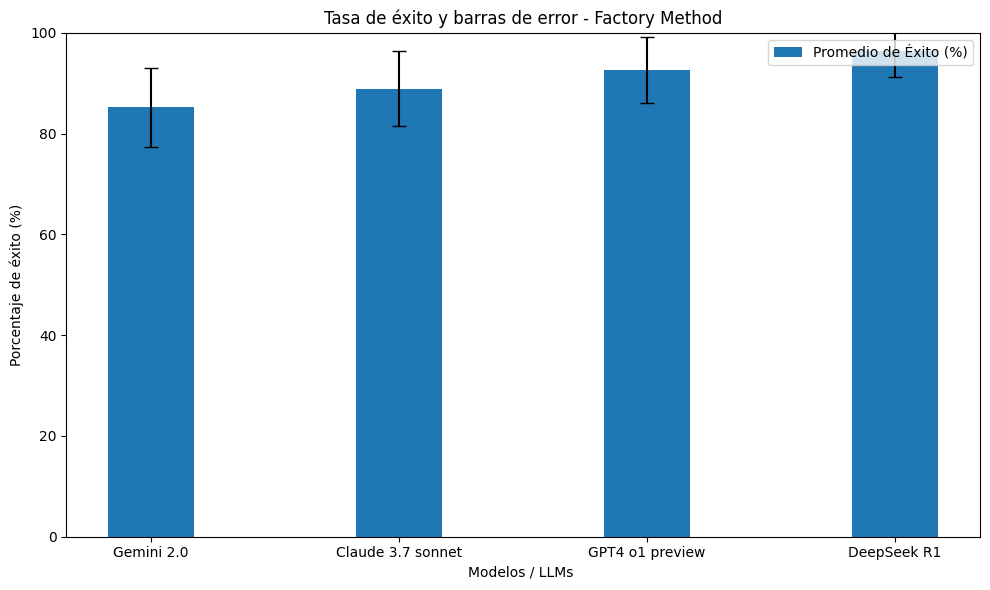

Gráfico 2: Observer


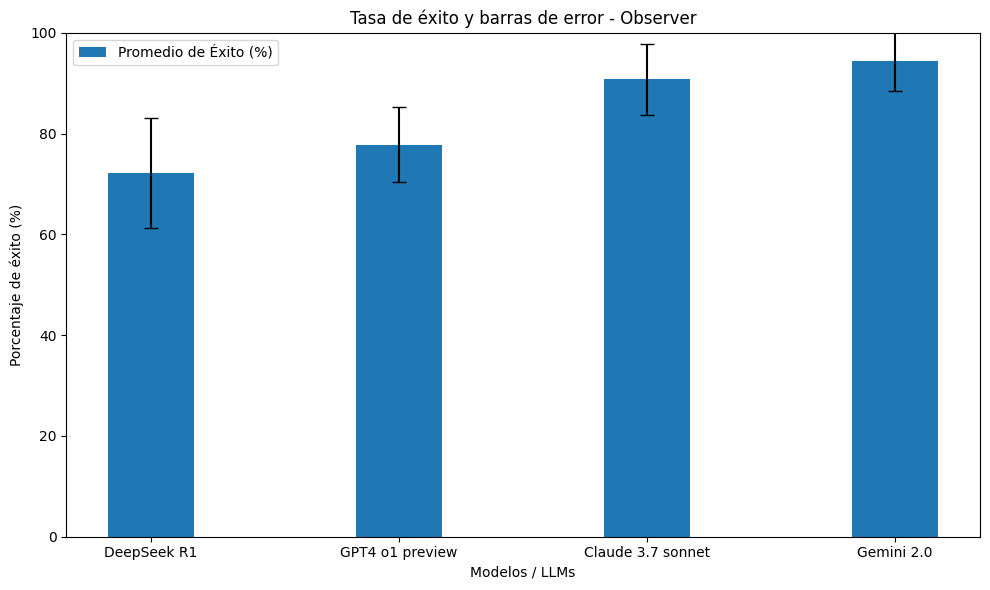

Gráfico 3: Strategy


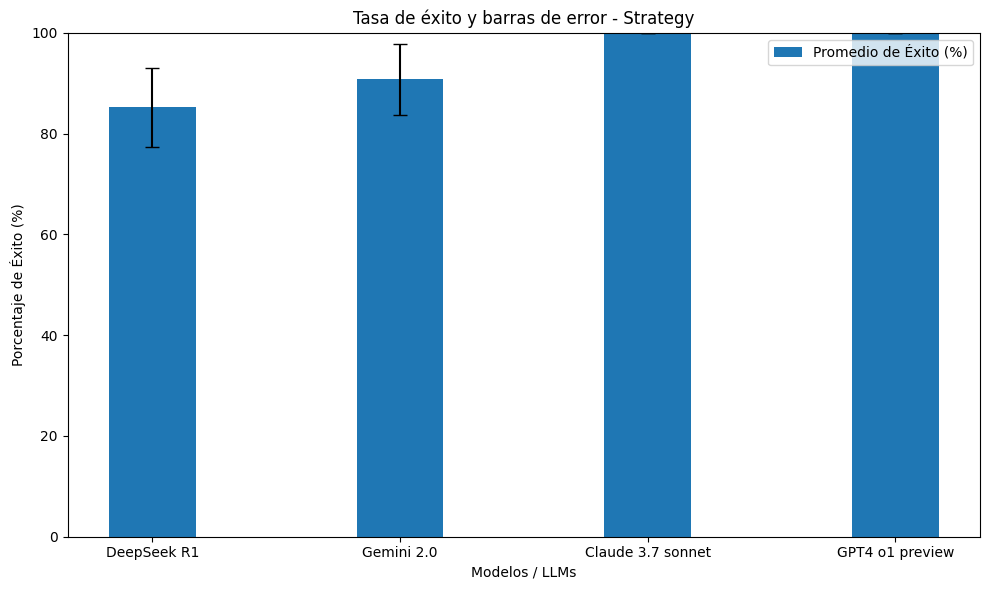

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Función para generar un gráfico de barras
def generar_grafico_en_notebook(tabla, titulo, etiqueta_x, etiqueta_y):
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(tabla))  # Posiciones en el eje X
    width = 0.35  # Ancho de las barras
    
    # Barras para el promedio de éxito
    ax.bar(x, tabla['Promedio_exito'] * 100, width, yerr=tabla['Error_bar'] * 100, capsize=5, label='Promedio de Éxito (%)')
    
    # Configuración del eje Y (0% a 100%)
    ax.set_ylim(0, 100)
    ax.set_ylabel(etiqueta_y)
    ax.set_xlabel(etiqueta_x)
    ax.set_title(titulo)
    ax.set_xticks(x)
    ax.set_xticklabels(tabla['LLMs'])
    ax.legend()
    
    # Mostrar el gráfico en el notebook
    plt.tight_layout()
    plt.show()

# Etiquetas personalizables
etiquetas = {
    "Factory": {
        "titulo": "Tasa de éxito y barras de error - Factory Method",
        "etiqueta_x": "Modelos / LLMs ",
        "etiqueta_y": "Porcentaje de éxito (%)"
    },
    "Observer": {
        "titulo": "Tasa de éxito y barras de error - Observer",
        "etiqueta_x": "Modelos / LLMs",
        "etiqueta_y": "Porcentaje de éxito (%)"
    },
    "Strategy": {
        "titulo": "Tasa de éxito y barras de error - Strategy",
        "etiqueta_x": "Modelos / LLMs",
        "etiqueta_y": "Porcentaje de Éxito (%)"
    }
}

# Ordenar la tabla de menor a mayor para el gráfico
factory_final = factory_final.sort_values(by='Promedio_exito', ascending=True)
observer_final = observer_final.sort_values(by='Promedio_exito', ascending=True)
strategy_final = strategy_final.sort_values(by='Promedio_exito', ascending=True)


# Generar y mostrar los gráficos en el notebook
print("Gráfico 1: Factory")
generar_grafico_en_notebook(factory_final, **etiquetas["Factory"])

print("Gráfico 2: Observer")
generar_grafico_en_notebook(observer_final, **etiquetas["Observer"])

print("Gráfico 3: Strategy")
generar_grafico_en_notebook(strategy_final, **etiquetas["Strategy"])

Gráfico 1: Factory


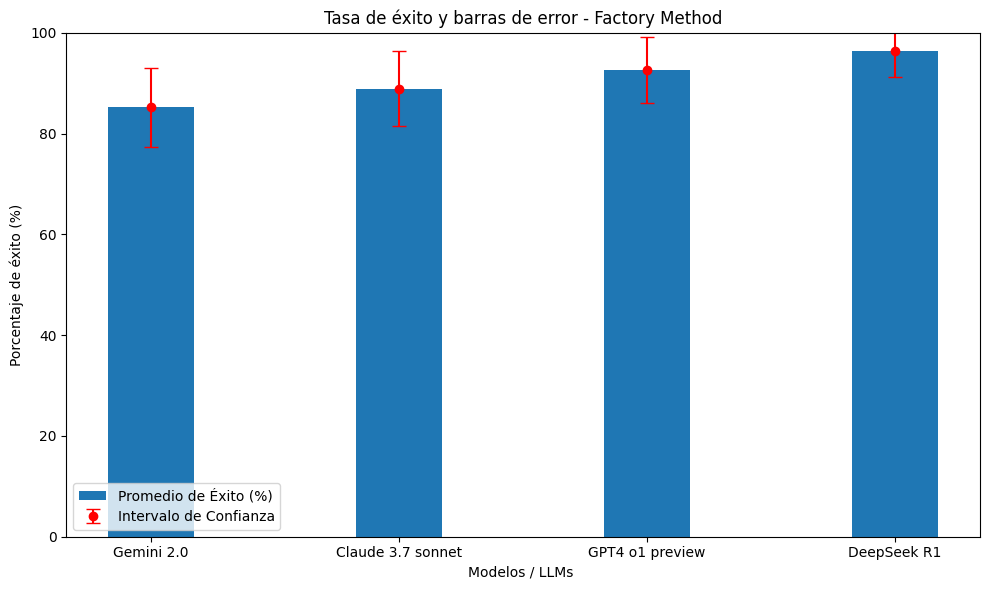

Gráfico 2: Observer


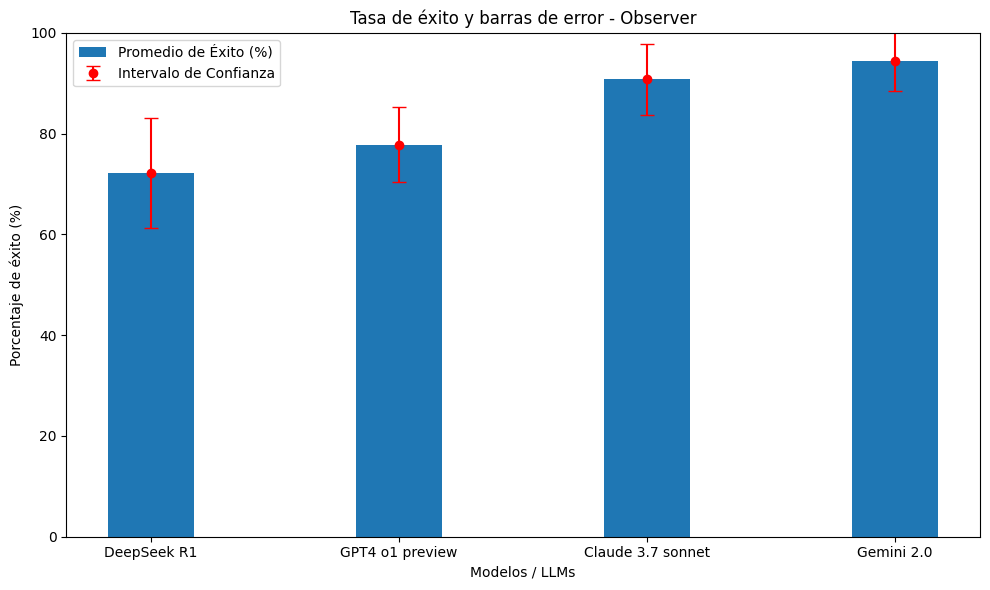

Gráfico 3: Strategy


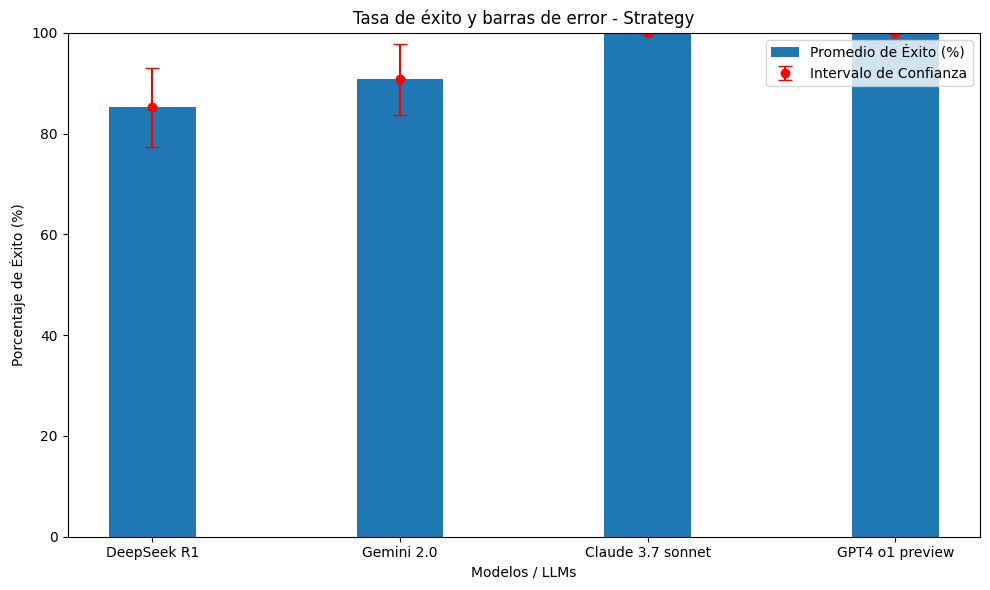

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Función para generar un gráfico de barras con intervalos de confianza
def generar_grafico_en_notebook(tabla, titulo, etiqueta_x, etiqueta_y):
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(tabla))  # Posiciones en el eje X
    width = 0.35  # Ancho de las barras
    
    # Barras para el promedio de éxito
    ax.bar(x, tabla['Promedio_exito'] * 100, width, label='Promedio de Éxito (%)')
    
    # Agregar los intervalos de confianza como puntos rojos con líneas de error
    ax.errorbar(
        x, 
        tabla['Promedio_exito'] * 100, 
        yerr=tabla['Error_bar'] * 100, 
        fmt='o', 
        color='red', 
        capsize=5, 
        label='Intervalo de Confianza'
    )
    
    # Configuración del eje Y (0% a 100%)
    ax.set_ylim(0, 100)
    ax.set_ylabel(etiqueta_y)
    ax.set_xlabel(etiqueta_x)
    ax.set_title(titulo)
    ax.set_xticks(x)
    ax.set_xticklabels(tabla['LLMs'])
    ax.legend()
    
    # Mostrar el gráfico en el notebook
    plt.tight_layout()
    plt.show()

# Etiquetas personalizables
etiquetas = {
    "Factory": {
        "titulo": "Tasa de éxito y barras de error - Factory Method",
        "etiqueta_x": "Modelos / LLMs ",
        "etiqueta_y": "Porcentaje de éxito (%)"
    },
    "Observer": {
        "titulo": "Tasa de éxito y barras de error - Observer",
        "etiqueta_x": "Modelos / LLMs",
        "etiqueta_y": "Porcentaje de éxito (%)"
    },
    "Strategy": {
        "titulo": "Tasa de éxito y barras de error - Strategy",
        "etiqueta_x": "Modelos / LLMs",
        "etiqueta_y": "Porcentaje de Éxito (%)"
    }
}

# Ordenar la tabla de menor a mayor para el gráfico
factory_final = factory_final.sort_values(by='Promedio_exito', ascending=True)
observer_final = observer_final.sort_values(by='Promedio_exito', ascending=True)
strategy_final = strategy_final.sort_values(by='Promedio_exito', ascending=True)

# Generar y mostrar los gráficos en el notebook
print("Gráfico 1: Factory")
generar_grafico_en_notebook(factory_final, **etiquetas["Factory"])

print("Gráfico 2: Observer")
generar_grafico_en_notebook(observer_final, **etiquetas["Observer"])

print("Gráfico 3: Strategy")
generar_grafico_en_notebook(strategy_final, **etiquetas["Strategy"])

In [63]:
import pandas as pd

# Crear una lista con los nombres de los patrones
patrones = ["Factory Method", "Observer", "Strategy"]

# Crear una lista con las tablas finales correspondientes
tablas_finales = [factory_final, observer_final, strategy_final]

# Crear una lista para almacenar las filas de la tabla consolidada
datos_consolidados = []

# Iterar sobre los patrones y sus tablas correspondientes
for patron, tabla in zip(patrones, tablas_finales):
    # Extraer las métricas promedio (asumiendo que son iguales para todos los LLMs en cada tabla)
    tasa_exito = tabla['Promedio_exito'].mean()
    desv_estandar_exito = tabla['Desviacion_estandar_exito'].mean()
    ic_inferior = tabla['IC_Inferior'].mean()
    ic_superior = tabla['IC_Superior'].mean()
    barra_error = tabla['Error_bar'].mean()
    tiempo_respuesta = tabla['Promedio_tiempo'].mean()
    desv_estandar_tiempo = tabla['Desviacion_estandar_tiempo'].mean()
    
    # Agregar una fila con los datos del patrón actual
    datos_consolidados.append([
        patron,
        tasa_exito,
        desv_estandar_exito,
        ic_inferior,
        ic_superior,
        barra_error,
        tiempo_respuesta,
        desv_estandar_tiempo
    ])

# Crear el DataFrame consolidado
tabla_consolidada = pd.DataFrame(datos_consolidados, columns=[
    "Patrón",
    "Tasa de éxito",
    "Desviación estándar (éxito)",
    "IC Inferior",
    "IC Superior",
    "Barra de error",
    "Tiempo de Respuesta",
    "Desviación estándar (tiempo)"
])

# Mostrar la tabla consolidada
print("Tabla Consolidada Final:")
display(tabla_consolidada)

# Exportar la tabla consolidada a un archivo Excel
output_file = "tabla_consolidada.xlsx"
tabla_consolidada.to_excel(output_file, index=False)
print(f"La tabla consolidada ha sido guardada en '{output_file}'.")

Tabla Consolidada Final:


,Patrón,Tasa de éxito,Desviación estándar (éxito),IC Inferior,IC Superior,Barra de error,Tiempo de Respuesta,Desviación estándar (tiempo)
0,Factory Method,0.907417,0.145615,0.840146,0.974687,0.067271,18.077778,11.806177
1,Observer,0.837977,0.169700,0.759579,0.916374,0.078398,19.897222,14.441754
2,Strategy,0.939821,0.081008,0.902397,0.977245,0.037424,19.450000,9.281936


La tabla consolidada ha sido guardada en 'tabla_consolidada.xlsx'.


## Resultados experimentales sobre la aplicabilidad en los patrones de diseño

In [1]:
import pandas as pd

# Exportar las tablas finales a un archivo Excel con tres hojas
output_file = "tablas_finales.xlsx"

# Crear un escritor de Excel usando pandas
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    # Guardar la tabla consolidada de patrones en una hoja llamada 'Tabla_Patrones'
    tabla_patrones.to_excel(writer, sheet_name='Tabla_Patrones', index=False)

print(f"La tabla ha sido guardada en el archivo '{output_file}' en el directorio actual.")

IndexError: At least one sheet must be visible

### Gráfico de barras para agrupar los patrones

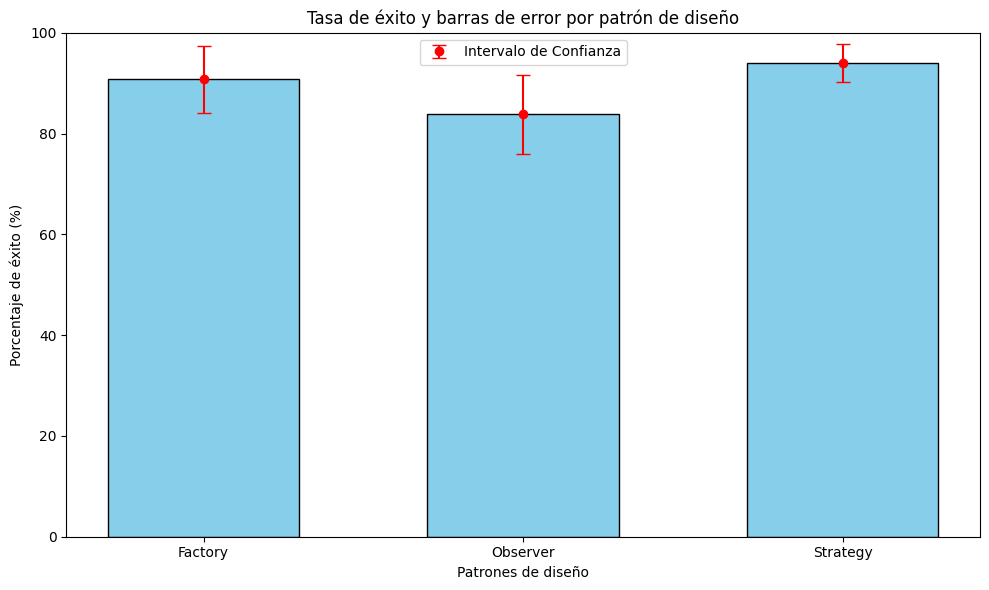

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Función para generar el gráfico de barras consolidado
def generar_grafico_patrones(tabla):
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(tabla))  # Posiciones en el eje X
    width = 0.6  # Ancho de las barras
    
    # Barras para el promedio de éxito
    ax.bar(x, tabla['Promedio_exito'] * 100, width, color='skyblue', edgecolor='black')
    
    # Agregar barras de error personalizadas
    ax.errorbar(
        x, 
        tabla['Promedio_exito'] * 100, 
        yerr=tabla['Error_bar'] * 100, 
        fmt='o',  # Formato de los puntos de error
        color='red',  # Color de las barras de error
        capsize=5,  # Tamaño de las tapas de las barras de error
        label='Intervalo de Confianza'  # Etiqueta para la leyenda
    )
    
    # Configuración del eje Y (0% a 100%)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Porcentaje de éxito (%)')
    ax.set_xlabel('Patrones de diseño')
    ax.set_title('Tasa de éxito y barras de error por patrón de diseño')
    ax.set_xticks(x)
    ax.set_xticklabels(tabla['Patrón'])
    
    # Mostrar leyenda
    ax.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Generar el gráfico consolidado de patrones
generar_grafico_patrones(tabla_patrones)

In [41]:
# Leer las tres hojas del archivo Excel
factory_df = pd.read_excel(file_path, sheet_name="No_experimentos")
observer_df = pd.read_excel(file_path, sheet_name="No_experimentos-o")
strategy_df = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Función para calcular todos los errores recurrentes por patrón
def calcular_todos_los_errores(df):
    # Contar la frecuencia de cada tipo de error
    errores = df[['Error tipo 1', 'Error tipo 2', 'Error tipo 3']].stack().value_counts()
    # Convertir a DataFrame
    errores_df = errores.reset_index()
    errores_df.columns = ['Tipo de Error', 'Frecuencia']
    # Ordenar por frecuencia (de menor a mayor)
    errores_df = errores_df.sort_values(by='Frecuencia', ascending=True)
    return errores_df

# Calcular todos los errores recurrentes para cada patrón
errores_factory = calcular_todos_los_errores(factory_df)
errores_observer = calcular_todos_los_errores(observer_df)
errores_strategy = calcular_todos_los_errores(strategy_df)

# Crear una tabla consolidada con todos los errores
tabla_errores = pd.DataFrame({
    'Patrón': ['Factory'] * len(errores_factory) + ['Observer'] * len(errores_observer) + ['Strategy'] * len(errores_strategy),
    'Tipo de Error': list(errores_factory['Tipo de Error']) + list(errores_observer['Tipo de Error']) + list(errores_strategy['Tipo de Error']),
    'Frecuencia': list(errores_factory['Frecuencia']) + list(errores_observer['Frecuencia']) + list(errores_strategy['Frecuencia'])
})

# Mostrar la tabla de errores ordenados de menor a mayor
print("Tabla de Todos los Errores Recurrentes (Ordenados de Menor a Mayor):")
display(tabla_errores)

Tabla de Todos los Errores Recurrentes (Ordenados de Menor a Mayor):


,Patrón,Tipo de Error,Frecuencia
0,Factory,1.0,20
1,Observer,1.0,33
2,Strategy,1.0,13


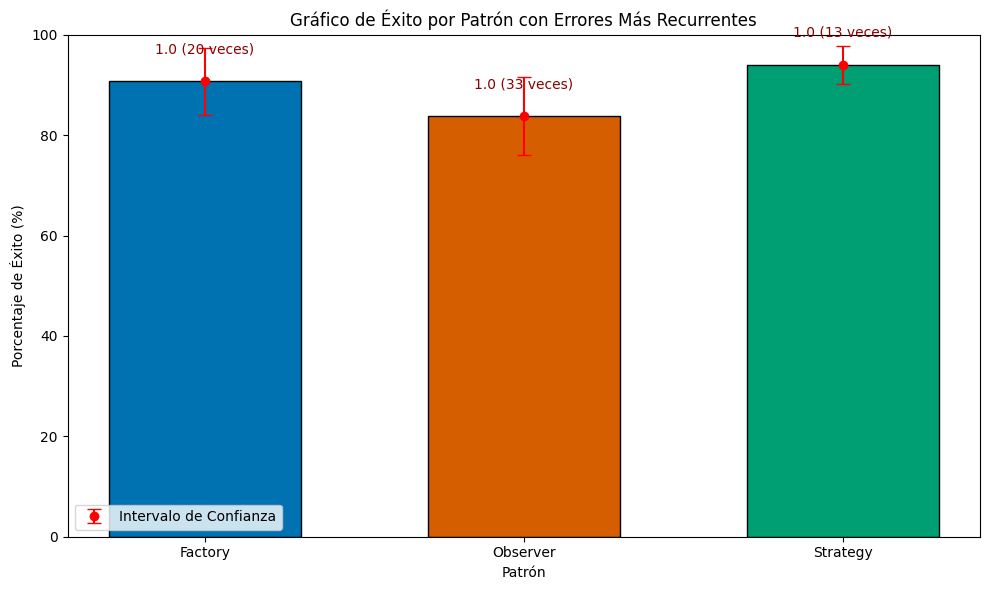

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores accesible para personas daltónicas
colores_accesibles = ['#0072B2', '#D55E00', '#009E73']  # Azul, Naranja, Verde

# Función para generar el gráfico con etiquetas de errores
def generar_grafico_con_errores(tabla, tabla_errores):
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(tabla))  # Posiciones en el eje X
    width = 0.6  # Ancho de las barras
    
    # Barras para el promedio de éxito
    ax.bar(x, tabla['Promedio_exito'] * 100, width, color=colores_accesibles, edgecolor='black')
    
    # Agregar barras de error personalizadas
    ax.errorbar(
        x, 
        tabla['Promedio_exito'] * 100, 
        yerr=tabla['Error_bar'] * 100, 
        fmt='o',  # Formato de los puntos de error
        color='red',  # Color de las barras de error
        capsize=5,  # Tamaño de las tapas de las barras de error
        label='Intervalo de Confianza'  # Etiqueta para la leyenda
    )
    
    # Agregar etiquetas con los errores más recurrentes
    for i, error in enumerate(tabla_errores['Error Más Recurrente']):
        ax.text(
            x[i],  # Posición en el eje X
            tabla['Promedio_exito'].iloc[i] * 100 + 5,  # Posición en el eje Y (ligeramente arriba de la barra)
            error,  # Texto de la etiqueta
            ha='center',  # Alineación horizontal
            va='bottom',  # Alineación vertical
            fontsize=10,  # Tamaño de fuente
            color='darkred'  # Color del texto
        )
    
    # Configuración del eje Y (0% a 100%)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Porcentaje de Éxito (%)')
    ax.set_xlabel('Patrón')
    ax.set_title('Gráfico de Éxito por Patrón con Errores Más Recurrentes')
    ax.set_xticks(x)
    ax.set_xticklabels(tabla['Patrón'])
    
    # Mostrar leyenda
    ax.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Generar el gráfico consolidado con etiquetas de errores
generar_grafico_con_errores(tabla_patrones, tabla_errores)

## Gráfico de boxplot para el promedio de tiempo de respuesta

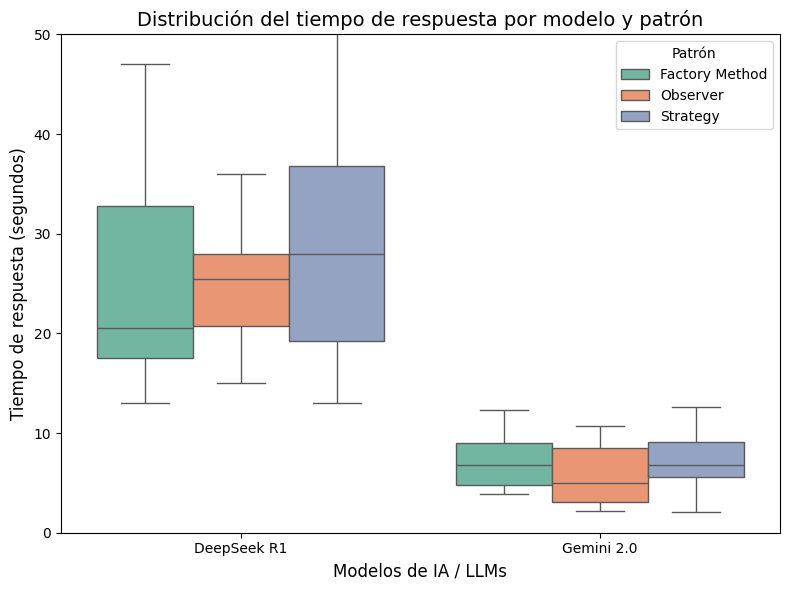

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos desde el archivo Excel
file_path = "resultados.xlsx"  # Cambia esto por la ruta de tu archivo Excel

# Leer cada hoja correspondiente a los patrones
# Leer cada hoja del archivo Excel
patron_1 = pd.read_excel(file_path, sheet_name="No_experimentos")
patron_2 = pd.read_excel(file_path, sheet_name="No_experimentos-o")
patron_3 = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Añadir una columna para identificar el patrón
patron_1['Patron'] = "Factory Method"
patron_2['Patron'] = "Observer"
patron_3['Patron'] = "Strategy"

# Combinar todos los datos en una sola tabla
tabla_completa = pd.concat([patron_1, patron_2, patron_3], ignore_index=True)

# 2. Filtrar los datos para incluir solo los modelos Deepseek r1 y Gemini 2.0
modelos_seleccionados = ['DeepSeek R1', 'Gemini 2.0']
datos_filtrados = tabla_completa[tabla_completa['LLMs'].isin(modelos_seleccionados)]

# 3. Crear la tabla final consolidada
tabla_final = datos_filtrados.groupby(['LLMs', 'Patron']).agg({
    'Tiempo de respuesta': ['mean', 'std'],  # Promedio y desviación estándar del tiempo
}).reset_index()

# Aplanar las columnas después del agrupamiento
tabla_final.columns = ['LLMs', 'Patron', 'Tiempo_promedio', 'Tiempo_std']

## No es necesario crear tabla porque ya está la anterior sobre los 3 patrones

# 4. Crear el gráfico de boxplot
plt.figure(figsize=(8, 6))

# Boxplot con Tiempo de respuesta en el eje Y
sns.boxplot(
    x='LLMs',
    y='Tiempo de respuesta',
    hue='Patron',  # Separar por patrón dentro de cada modelo
    data=datos_filtrados,
    palette='Set2'
)

# Ajustar el eje Y para que vaya hasta 60 segundos
plt.ylim(0, 50)  # Límites del eje Y: desde 0 hasta 60

# Etiquetas y título
plt.xlabel('Modelos de IA / LLMs', fontsize=12)
plt.ylabel('Tiempo de respuesta (segundos)', fontsize=12)
plt.title('Distribución del tiempo de respuesta por modelo y patrón', fontsize=14)

# Ajustar leyenda
plt.legend(title='Patrón', loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Para graficar boxplot con la desviación estándar del promedio de tiempo de respuesta

In [18]:
# Agregar una columna "Patrón" a cada tabla
factory_final['Patrón'] = 'Factory'
observer_final['Patrón'] = 'Observer'
strategy_final['Patrón'] = 'Strategy'

# Combinar las tres tablas en una única tabla final
tabla_unica = pd.concat([factory_final, observer_final, strategy_final], ignore_index=True)

# Mostrar la tabla final única
print("Tabla Final Única:")
display(tabla_unica)

Tabla Final Única:


,LLMs,Promedio_exito,Desviacion_estandar_exito,IC_Inferior,IC_Superior,Error_bar,Promedio_tiempo,Desviacion_estandar_tiempo,Patrón
0,Gemini 2.0,0.851867,0.170420,0.773137,0.930597,0.078730,7.155556,2.678284,Factory
1,Claude 3.7 sonnet,0.888900,0.161674,0.814210,0.963590,0.074690,NaN,NaN,Factory
2,GPT4 o1 preview,0.925933,0.142583,0.860063,0.991803,0.065870,NaN,NaN,Factory
3,DeepSeek R1,0.962967,0.107783,0.913174,1.012760,0.049793,29.000000,20.934070,Factory
4,DeepSeek R1,0.722239,0.235698,0.613353,0.831126,0.108887,34.111111,25.974850,Observer
5,GPT4 o1 preview,0.777800,0.161674,0.703110,0.852490,0.074690,NaN,NaN,Observer
6,Claude 3.7 sonnet,0.907417,0.153614,0.836451,0.978383,0.070966,NaN,NaN,Observer
7,Gemini 2.0,0.944450,0.127815,0.885403,1.003497,0.059047,5.683333,2.908658,Observer
8,DeepSeek R1,0.851867,0.170420,0.773137,0.930597,0.078730,31.611111,15.889837,Strategy
9,Gemini 2.0,0.907417,0.153614,0.836451,0.978383,0.070966,7.288889,2.674034,Strategy


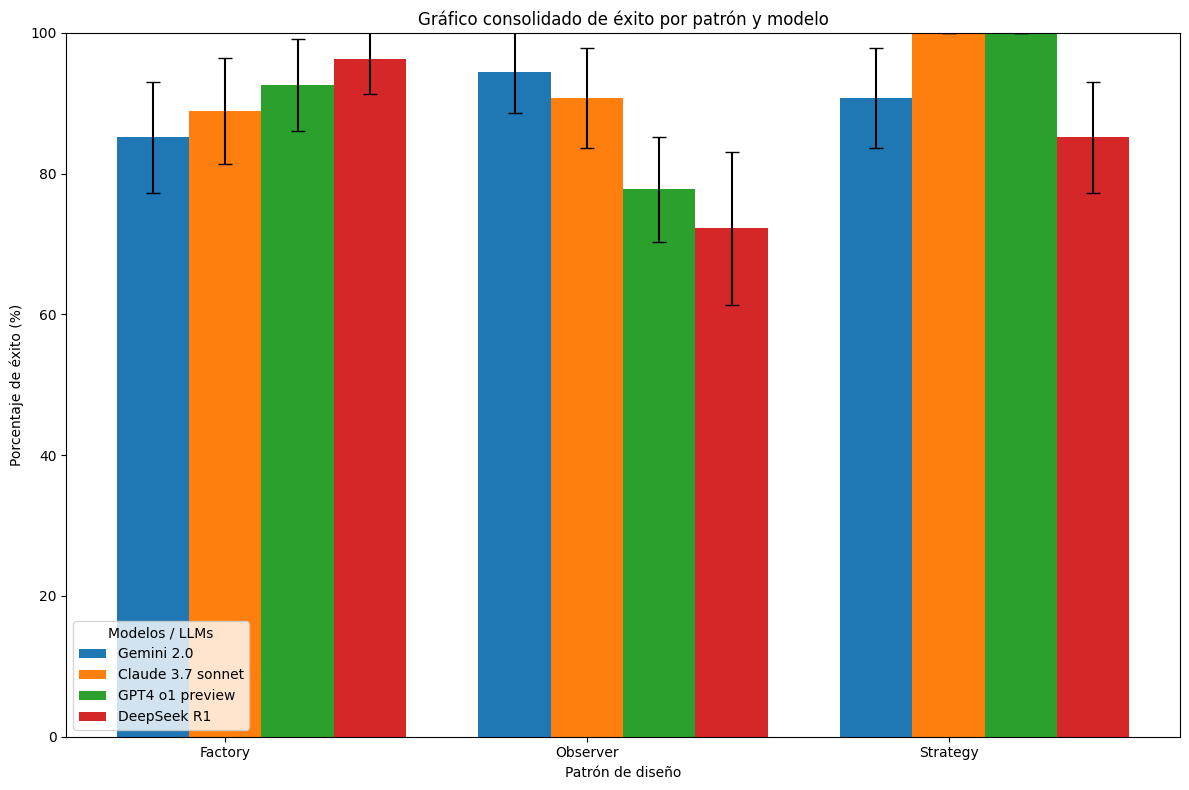

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Función para generar el gráfico consolidado
def generar_grafico_consolidado(tabla):
    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Agrupar los datos por patrón y modelo
    patrones = tabla['Patrón'].unique()
    x = np.arange(len(patrones))  # Posiciones en el eje X
    width = 0.2  # Ancho de las barras
    
    # Dibujar una barra para cada modelo
    for i, modelo in enumerate(tabla['LLMs'].unique()):
        subset = tabla[tabla['LLMs'] == modelo]
        promedios = subset['Promedio_exito'] * 100
        errores = subset['Error_bar'] * 100
        ax.bar(x + i * width, promedios, width, yerr=errores, capsize=5, label=modelo)
    
    # Configuración del eje Y (0% a 100%)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Porcentaje de éxito (%)')
    ax.set_xlabel('Patrón de diseño')
    ax.set_title('Gráfico consolidado de éxito por patrón y modelo')
    ax.set_xticks(x + width)
    ax.set_xticklabels(patrones)
    ax.legend(title="Modelos / LLMs")
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Generar el gráfico consolidado
generar_grafico_consolidado(tabla_unica)